# This is an exploratory data analysis of the FIFA22 dataset.

## The FIFA22 dataset contains all key attributes, and features of male football players around the world. In this analysis, I focus on major attributes to see relationship between common variables such as;

* Potential & wages.
* Reputation & Value.
* Reputation and wages
* Height and potential.

## I also answer questions such as;

* what are the height, wage, weight and age distribution of players?
* What is the prevalent foot amont players?
* What are the countries with the highest representation in the data?
* What are the most common player position?
* Who are the highest paid players?
* Who are the best players overall?


## Overall it is an interesting dataset with a lot of dimension, I will however be focusing on dimensions I consider common and most important. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

# Load, Preview and Prepare the Data

In [2]:
# Load data and preview 

df = pd.read_csv("fifa22.csv")
df.head(5)

C:\Users\br1ght\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
# The column names

df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [4]:
# Check the numeric values

df.select_dtypes(include='number')

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,...,37,38,43,48,6,10,5,15,13,NaN
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,...,47,37,44,47,11,12,6,8,10,NaN
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,...,36,38,44,48,8,6,7,10,6,NaN
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,...,47,10,14,11,7,10,7,14,15,NaN


In [5]:
# What's the shape of this data
df.shape

(19239, 110)

In [6]:
# check for datatypes, some might require changing depending on what needs to be done.
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

# Descritive Statistics & Regression Analysis

In [7]:
# Let's check out some basic statistics

df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


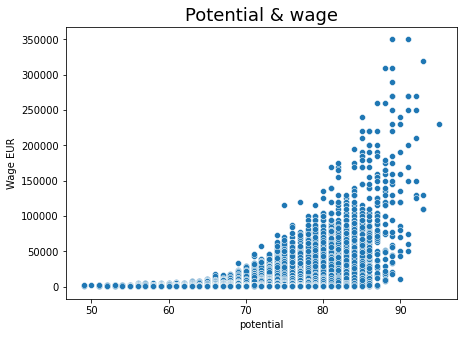

In [8]:
# Let's plot the relationship between player potential and wages

plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

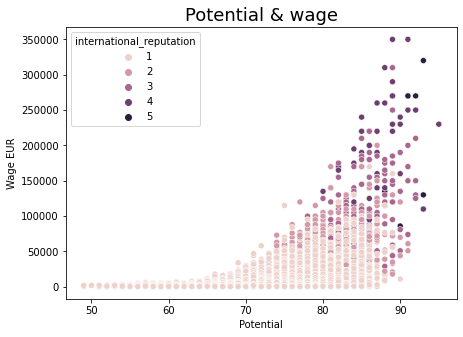

In [9]:
# Let's plot the relationship between player potential and wages, filtered by International reputation

plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

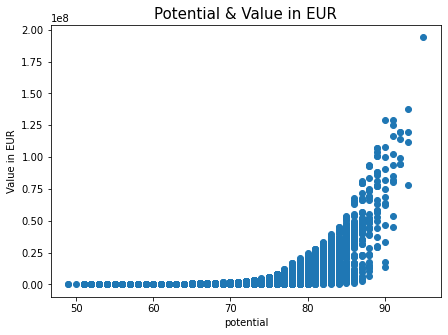

In [10]:
# Let's plot the relationship between player potential and value

fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("potential") 
plt.ylabel("Value in EUR")
plt.title("Potential & Value in EUR", fontsize = 15)
plt.show()

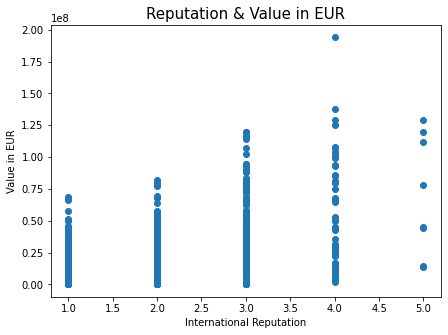

In [11]:
# Let's plot the relationship between player reputation and value


fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['international_reputation'], y=df['value_eur'] )
plt.xlabel("International Reputation") 
plt.ylabel("Value in EUR")
plt.title("Reputation & Value in EUR", fontsize = 15)

plt.show()

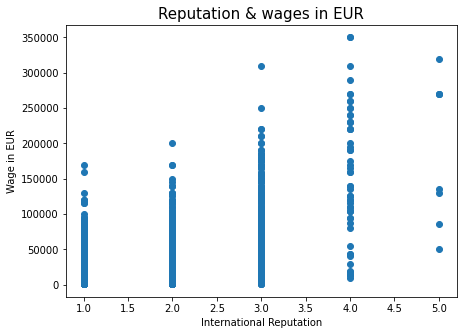

In [12]:
# Let's plot the relationship between player reputation and wages


fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['international_reputation'], y=df['wage_eur'] )
plt.xlabel("International Reputation") 
plt.ylabel("Wage in EUR")
plt.title("Reputation & wages in EUR", fontsize = 15)
plt.show()

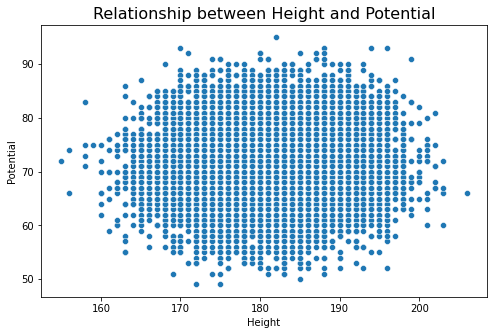

In [13]:
# Let's plot the relationship between player height and potential


fig, ax = plt.subplots(figsize = (8,5))
ax = sns.scatterplot(x =df['height_cm'], y = df['potential'])
plt.xlabel("Height") 
plt.ylabel("Potential")
plt.title("Relationship between Height and Potential", fontsize = 16)
plt.show()

### Interesting, and as expected, there seems to be a correlation between some common variables, like players of high potentials tend to earn more. I'll drill down to the top 15 players & see if the same is true.

In [54]:
top_15 = df.nlargest(15, 'overall')
top_15.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


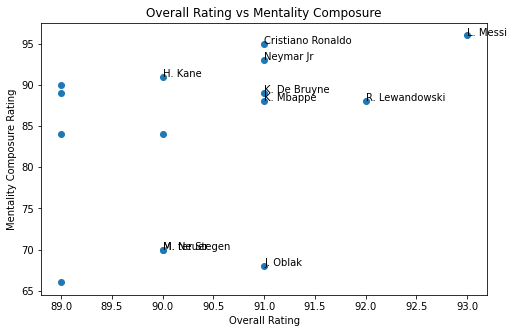

In [58]:
# Does mentaility composure rating correlate with how players are rated overall? Let's check that.

fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_15['overall'], top_15['mentality_composure'])

plt.text(top_15.iloc[0]['overall'], top_15.iloc[0]['mentality_composure'], top_15.iloc[0]['short_name'])
plt.text(top_15.iloc[1]['overall'], top_15.iloc[1]['mentality_composure'], top_15.iloc[1]['short_name'])
plt.text(top_15.iloc[2]['overall'], top_15.iloc[2]['mentality_composure'], top_15.iloc[2]['short_name'])
plt.text(top_15.iloc[3]['overall'], top_15.iloc[3]['mentality_composure'], top_15.iloc[3]['short_name'])
plt.text(top_15.iloc[4]['overall'], top_15.iloc[4]['mentality_composure'], top_15.iloc[4]['short_name'])
plt.text(top_15.iloc[5]['overall'], top_15.iloc[5]['mentality_composure'], top_15.iloc[5]['short_name'])
plt.text(top_15.iloc[6]['overall'], top_15.iloc[6]['mentality_composure'], top_15.iloc[6]['short_name'])
plt.text(top_15.iloc[7]['overall'], top_15.iloc[7]['mentality_composure'], top_15.iloc[7]['short_name'])
plt.text(top_15.iloc[8]['overall'], top_15.iloc[8]['mentality_composure'], top_15.iloc[8]['short_name'])
plt.text(top_15.iloc[9]['overall'], top_15.iloc[9]['mentality_composure'], top_15.iloc[9]['short_name'])

ax.set_title("Overall Rating vs Mentality Composure")
ax.set_ylabel('Mentality Composure Rating')
ax.set_xlabel('Overall Rating')

plt.show()

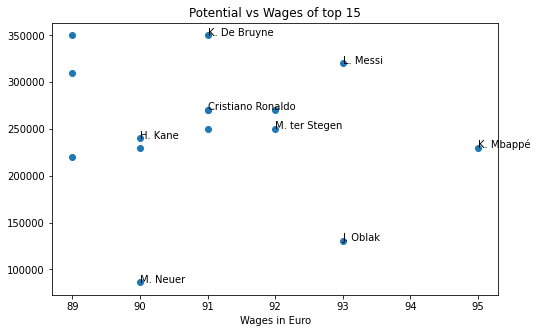

In [53]:
# Let's see if high overall score correlates with earnings, for the top 15 players

fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_15['potential'], top_15['wage_eur'] )
plt.text(top_15.iloc[0]['potential'], top_15.iloc[0]['wage_eur'], top_15.iloc[0]['short_name'])
# plt.text(top_15.iloc[1]['potential'], top_15.iloc[1]['wage_eur'], top_15.iloc[1]['short_name']) for better view
plt.text(top_15.iloc[2]['potential'], top_15.iloc[2]['wage_eur'], top_15.iloc[2]['short_name'])
# plt.text(top_15.iloc[3]['potential'], top_15.iloc[3]['wage_eur'], top_15.iloc[3]['short_name'])
plt.text(top_15.iloc[4]['potential'], top_15.iloc[4]['wage_eur'], top_15.iloc[4]['short_name'])
plt.text(top_15.iloc[5]['potential'], top_15.iloc[5]['wage_eur'], top_15.iloc[5]['short_name'])
plt.text(top_15.iloc[6]['potential'], top_15.iloc[6]['wage_eur'], top_15.iloc[6]['short_name'])
plt.text(top_15.iloc[7]['potential'], top_15.iloc[7]['wage_eur'], top_15.iloc[7]['short_name'])
plt.text(top_15.iloc[8]['potential'], top_15.iloc[8]['wage_eur'], top_15.iloc[8]['short_name'])
plt.text(top_15.iloc[9]['potential'], top_15.iloc[9]['wage_eur'], top_15.iloc[9]['short_name'])

ax.set_title("Potential vs Wages of top 15")
ax.set_ylabel('Wages in Eur')
ax.set_xlabel('Potential')

plt.show()


#mentality_composure

### Among the top 15 players, we see that there's no relationship between potential & wages. Interesting.

# Additional Insights & Data Visualization

In [46]:
# I want to group player earnings based on their work rate

df.groupby("work_rate")["wage_eur"].max()

work_rate
High/High        350000.0
High/Low         270000.0
High/Medium      290000.0
Low/High         140000.0
Low/Low          130000.0
Low/Medium       125000.0
Medium/High      230000.0
Medium/Low       320000.0
Medium/Medium    350000.0
Name: wage_eur, dtype: float64

In [15]:
# All available workrate metrics

df['work_rate'].unique()

array(['Medium/Low', 'High/Medium', 'High/Low', 'High/High',
       'Medium/Medium', 'Medium/High', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

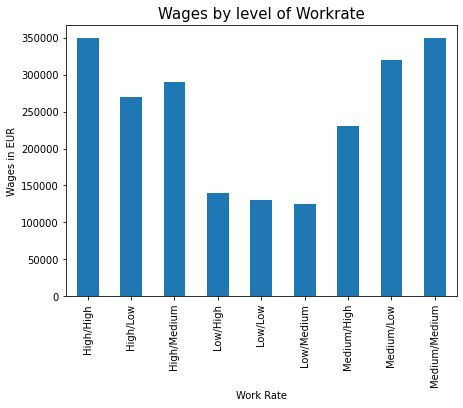

In [16]:
# In a plot, we visualize player earnings based on recored workrate

fig, ax = plt.subplots(figsize=(7,5))
df.groupby("work_rate")["wage_eur"].max().plot.bar()
plt.xlabel("Work Rate") 
plt.ylabel("Wages in EUR")
plt.title("Wages by level of Workrate", fontsize = 15)
plt.show()

C:\Users\br1ght\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\br1ght\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


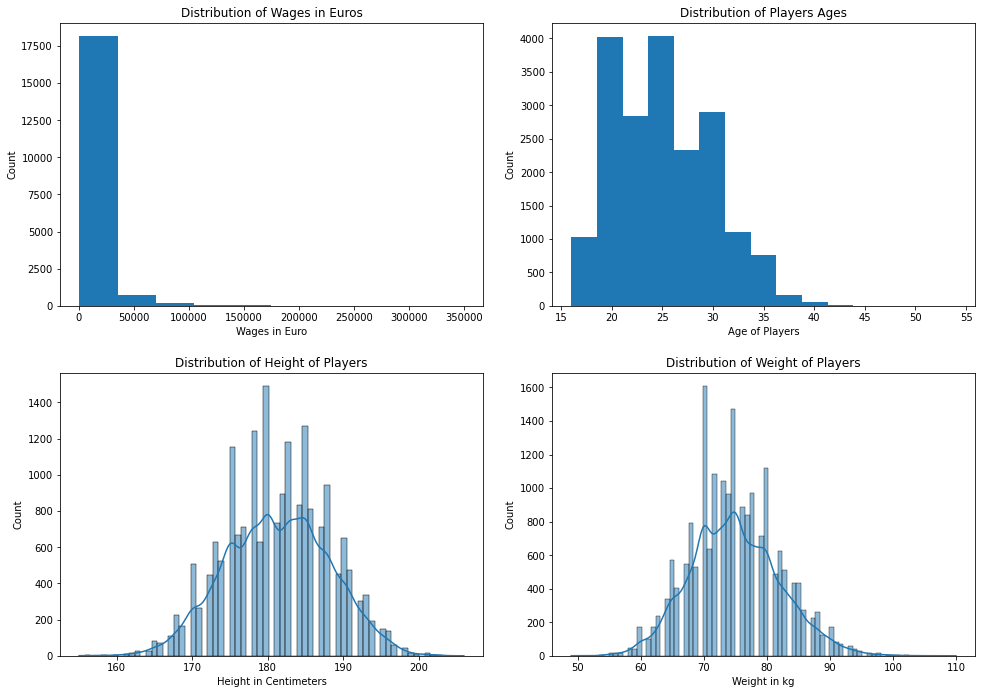

In [17]:
# Let's visualize the distribution of key metrics

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(df['wage_eur'])
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[0,1].hist(df['age'], bins = 15)
axes[0,1].set_xlabel('Age of Players')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Players Ages')

# first two is using a matplotlib syntax, the next two I'll do with seaborn 

axes[1,0].set_title('Distribution of Height of Players')
sns.histplot(df, x='height_cm', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Height in Centimeters')
axes[1,0].set_ylabel('Count')


axes[1,1].set_title('Distribution of Weight of Players')
sns.histplot(df, x='weight_kg', ax=axes[1,1], kde=True)
axes[1,1].set_xlabel('Weight in kg')
axes[1,1].set_ylabel('Count')


plt.tight_layout(pad=2)
plt.show()

In [18]:
# Quick calculation to separate players based on preferred foot

df.groupby(['preferred_foot']).count()[['sofifa_id']]

,sofifa_id
preferred_foot,
Left,4565
Right,14674


In [19]:
df.groupby(['preferred_foot']).count().sum()[['sofifa_id']]

sofifa_id    19239
dtype: int64

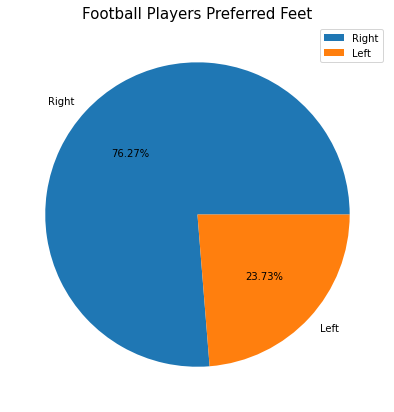

In [20]:
# Visualize with a pie, and include percentages using autopct

# Which foot does the footballers in fifa 21 use more?

preferred_foot_labels = df["preferred_foot"].value_counts().index # (Right,Left) 
preferred_foot_values = df["preferred_foot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate the pie

# Visualize

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()

In [21]:
# What nationalities are the most popular in the dataset?

df['nationality_name'].value_counts()

England             1719
Germany             1214
Spain               1086
France               980
Argentina            960
                    ... 
Bermuda                1
Mauritius              1
Papua New Guinea       1
Saint Lucia            1
Gibraltar              1
Name: nationality_name, Length: 163, dtype: int64

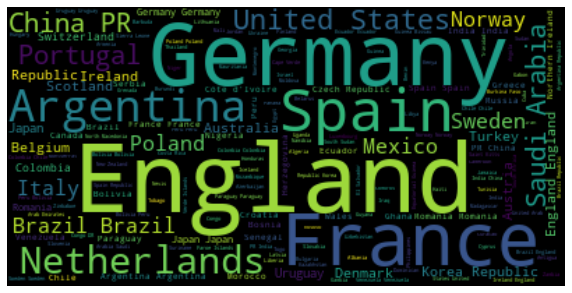

In [22]:
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [23]:
# Another method to do this

from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(5))
bar_plot

{'England': 1719,
 'Germany': 1214,
 'Spain': 1086,
 'France': 980,
 'Argentina': 960}

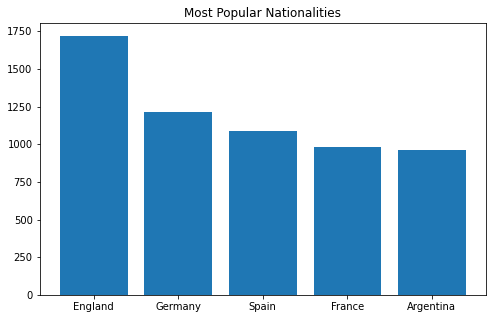

In [24]:
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Most Popular Nationalities')
plt.show()

In [25]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

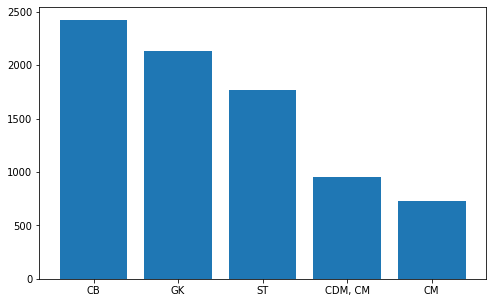

In [26]:
# What are the most common player positions?

fig, ax = plt.subplots(figsize = (8,5))
plot_most_common('player_positions')
plt.show()

In [27]:
# top 10 players, sorted primarily by wages

player_name = df[['wage_eur','short_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['wage_eur']).set_index('short_name')
player_name

,wage_eur,value_eur,overall,age,nationality_name,potential,international_reputation
short_name,,,,,,,
K. De Bruyne,350000.0,125500000.0,91,30,Belgium,91,4
K. Benzema,350000.0,66000000.0,89,33,France,89,4
L. Messi,320000.0,78000000.0,93,34,Argentina,93,5
Casemiro,310000.0,88000000.0,89,29,Brazil,89,3
T. Kroos,310000.0,75000000.0,88,31,Germany,88,4
R. Sterling,290000.0,107500000.0,88,26,England,89,4
R. Lewandowski,270000.0,119500000.0,92,32,Poland,92,5
Cristiano Ronaldo,270000.0,45000000.0,91,36,Portugal,91,5
Neymar Jr,270000.0,129000000.0,91,29,Brazil,91,5


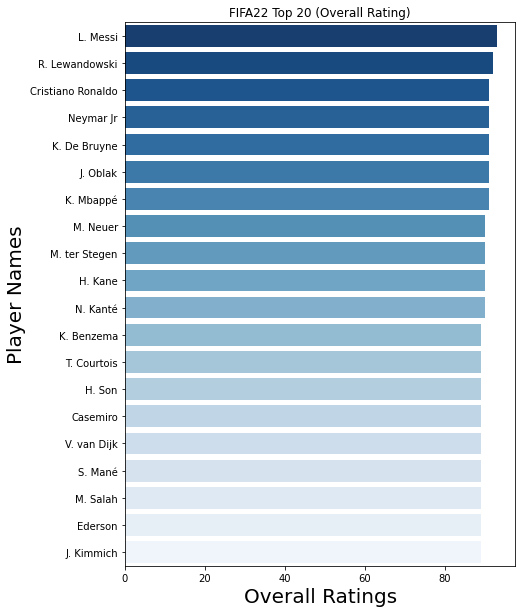

In [28]:
# Top 20 players overall

# We get the names and overals from the data
Overall = df["overall"]
footballer_name = df["short_name"]

# Let's create dataframe(Name,Overall)
data = pd.DataFrame({'short_name': footballer_name,'overall':Overall})

x = df['short_name'].head(20) 
y = df['overall'].head(20)

# plot
plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 20) 
plt.ylabel('Player Names', size = 20 ) 
plt.title('FIFA22 Top 20 (Overall Rating)')

plt.show()


# Conclusion

## This is such an interesting data to work with. I will look into the source of the data to understand how variables like players mentality was measured.

## From the analysis, we can conclude that;

* Messi is the best player.
* Kevin De Bryune is currently the highest paid.
* Majority of football players are right footed.
* Majority of football players are centerbacks/central defenders.
* There's generally a positive relationship between players potential rating & wages.
* However among the top 15 players, this is not the case.
* England have the most representation among countries in the data, followed by Germany.

## I hope you enjoyed this analysis, feel free to take this further, there's so much more insights that can be taken from the data.